In [ ]:

import sqlite3
import os.path
import gdown
# Connect to your google drive where the database files are located
from google.colab import drive
drive.mount('/content/drive')
# Check if the data file we need is there, otherwise download it
if not os.path.isfile('/content/drive/MyDrive/ml15.sqlite'):
    print('The required data was not already in your google drive. It will now be downloaded.')
    url = 'https://dl.dropboxusercontent.com/s/owbcf81aw6z45xe/ml15.sqlite'
    output = '/content/drive/MyDrive/ml15.sqlite'
    gdown.download(url, output, quiet=False)


In [ ]:

%load_ext sql
%sql sqlite:///drive/MyDrive/ml15.sqlite

'Connected: @drive/MyDrive/ml15.sqlite'

1. Familiarizing with available data


In [ ]:
# Importing basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%sql
-- show all tables
SELECT tbl_name FROM sqlite_master

 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


tbl_name
customers
products
receipt_lines
receipts
stores
receipts
receipts
receipts
receipt_lines
receipt_lines


In [ ]:
sql=%%sql SELECT * from receipt_lines
sql.DataFrame()

 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


,receipt_line_id,receipt_id,product_code,qty,value
0,683951,48773,15185,1,3.09
1,727185,46058,15185,1,3.09
2,727194,46007,15185,1,3.09
3,727176,10161,15185,1,3.09
4,260982,12267,8600,1,0.69
...,...,...,...,...,...
718831,168854,11644,9882,1,1.99
718832,536066,46304,12437,1,9999999.00
718833,536064,46304,7871,1,9999999.00
718834,536065,46304,7487,2,9999999.00


In [ ]:
%%sql create table sum_table as
SELECT receipt_id, SUM(qty) as tot_qty,SUM(value) as tot_val
from receipt_lines
GROUP BY receipt_id

 * sqlite:///drive/MyDrive/ml15.sqlite
(sqlite3.OperationalError) table sum_table already exists
[SQL: create table sum_table as
SELECT receipt_id, SUM(qty) as tot_qty,SUM(value) as tot_val
from receipt_lines
GROUP BY receipt_id]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
sql = """
SELECT * 
FROM sum_table
"""
df_new_rec=%sql {sql}
df_new_rec.DataFrame()

 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


,receipt_id,tot_qty,tot_val
0,1,2,18.73
1,2,5,4.09
2,3,52,71.29
3,4,13,19.83
4,5,6,10.78
...,...,...,...
69278,71136,14,24.17
69279,71137,8,5.08
69280,71138,3,2.39
69281,71139,3,10.24


In [ ]:
%%sql 
CREATE TABLE "Merged_data" ('receipt_id' int, "purchased_at" date, 'customer_id'int, 'tot_qty' int, "tot_val" int, 'day' int)

 * sqlite:///drive/MyDrive/ml15.sqlite
(sqlite3.OperationalError) table "Merged_data" already exists
[SQL: CREATE TABLE "Merged_data" ('receipt_id' int, "purchased_at" date, 'customer_id'int, 'tot_qty' int, "tot_val" int, 'day' int)]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
%%sql
INSERT INTO 'Merged_data'
SELECT receipts.receipt_id, purchased_at, customer_id, tot_qty, tot_val, julianday(purchased_at)-julianday('2020-07-22') AS data
FROM receipts
INNER JOIN sum_table ON receipts.receipt_id=sum_table.receipt_id
ORDER BY purchased_at

 * sqlite:///drive/MyDrive/ml15.sqlite
69283 rows affected.


[]

In [ ]:
# Proceeding with creating temporal data 
df=%%sql SELECT * FROM Merged_data
df.DataFrame()

 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


,receipt_id,purchased_at,customer_id,tot_qty,tot_val,day
0,244,2020-07-22 00:00:00,15547,17,33.82,0
1,1839,2020-07-22 00:00:00,2794,36,49.37,0
2,1964,2020-07-22 00:00:00,13396,2,5.14,0
3,2866,2020-07-22 00:00:00,5948,8,30.21,0
4,3541,2020-07-22 00:00:00,4157,20,74.24,0
...,...,...,...,...,...,...
1316372,67416,2022-03-22 00:00:00,2695,5,8.83,608
1316373,67568,2022-03-22 00:00:00,2505,27,35.20,608
1316374,69088,2022-03-22 00:00:00,14269,7,6.76,608
1316375,69225,2022-03-22 00:00:00,888,4,13.53,608


In [ ]:
df_merged = df.DataFrame()

In [ ]:
df_merged.head()

,receipt_id,purchased_at,customer_id,tot_qty,tot_val,day
0,244,2020-07-22 00:00:00,15547,17,33.82,0
1,1839,2020-07-22 00:00:00,2794,36,49.37,0
2,1964,2020-07-22 00:00:00,13396,2,5.14,0
3,2866,2020-07-22 00:00:00,5948,8,30.21,0
4,3541,2020-07-22 00:00:00,4157,20,74.24,0


In [ ]:
### Making Temporal Features


In [ ]:
%%sql 
SELECT JULIANDAY(max(purchased_at))-JULIANDAY(min(purchased_at))
FROM Merged_data

 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


JULIANDAY(max(purchased_at))-JULIANDAY(min(purchased_at))
608.0


In [ ]:
%%sql
SELECT date('2022-03-22','-28 days')

 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


"date('2022-03-22','-28 days')"
2022-02-22


In [ ]:
ref_day= 608-28
ref_date= 608-28

2. 
 Making Temporal Features 

In [ ]:
# The get_dataset function creates input and output variables for machine learning tasks. Output is based on selected definition of churn, i.e., 28 days for me.
# reference day is the period from which output feature is being derived. In other words, ref day = Max(date)-28 = 608-28 in my case
# fi_v, fi_q, fi_f, fi_shop shows the weekly data of a cutomer(tumbling windom size) for total monetary value, total quantity and frequency of visits in the week. 
#Fourth variable for each periods is binary withe whether the person came for shopping or not. 1 shows he did not appear while
#######It is important to note that we have indexed X and Y with cutomer_id. So, the column will appear while lookig at data frame, but it will not be part of features
## Later on, after predictiong churn for future windom, beyong 608 days, we will trace back churners and non-churners using customer_id.

def get_dataset( reference_day , tumbling_window_size, output_window_size ):
    sql = """
    SELECT customer_id,
     {ref_date} AS ref_day,
      SUM(CASE WHEN day> {ref_date} AND day<={ref_date}+{ows} THEN tot_val ELSE 0 END) AS output_y,
      SUM(CASE WHEN day> {ref_date} AND day <={ref_date}+{ows} THEN tot_qty ELSE 0 END) AS output_q,
      COUNT(DISTINCT CASE WHEN day>{ref_date} AND day<={ref_date}+{ows} THEN day END) as output_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day>{ref_date} AND day<={ref_date}+{ows} THEN day END)==0 THEN 1 ELSE 0 END) as output_churn,

      SUM(CASE WHEN day> {ref_date}-{ws} AND day <= {ref_date} THEN tot_val ELSE 0 END) as f1_v,
      SUM(CASE WHEN day> {ref_date}-{ws} AND day <= {ref_date} THEN tot_qty ELSE 0 END) as f1_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-{ws} AND day <= {ref_date} THEN day END) as f1_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-{ws} AND day <= {ref_date} THEN day END)==0 THEN 1 ELSE 0 END) as w1_shop,

      SUM(CASE WHEN day> {ref_date}-2*{ws} AND day <= {ref_date}-{ws} THEN tot_val ELSE 0 END) as f2_v,
      SUM(CASE WHEN day> {ref_date}-2*{ws} AND day <= {ref_date} -{ws} THEN tot_qty ELSE 0 END) as f2_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-2*{ws} AND day <= {ref_date} -{ws} THEN day END) as f2_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-2*{ws} AND day <= {ref_date}-{ws} THEN day END)==0 THEN 1 ELSE 0 END) as w2_shop,

      SUM(CASE WHEN day> {ref_date}-3*{ws} AND day <= {ref_date}-2*{ws} THEN tot_val ELSE 0 END) as f3_v,
      SUM(CASE WHEN day> {ref_date}-3*{ws} AND day <= {ref_date}-2*{ws} THEN tot_qty ELSE 0 END) as f3_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-3*{ws} AND day <= {ref_date}-2*{ws} THEN day END) as f3_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-3*{ws} AND day <= {ref_date}-2*{ws} THEN day END)==0 THEN 1 ELSE 0 END) as f3_shop,
    
      SUM(CASE WHEN day> {ref_date}-4*{ws} AND day <= {ref_date} - 3*{ws} THEN tot_val ELSE 0 END) as f4_v,
      SUM(CASE WHEN day> {ref_date}-4*{ws} AND day <= {ref_date}-3*{ws} THEN tot_qty ELSE 0 END) as f4_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-4*{ws} AND day <= {ref_date}-3*{ws} THEN day END) as f4_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-4*{ws} AND day <= {ref_date}-3*{ws} THEN day END)==0 THEN 1 ELSE 0 END) as w4_shop,

      SUM(CASE WHEN day> {ref_date}-5*{ws} AND day <= {ref_date} - 4*{ws} THEN tot_val ELSE 0 END) as f5_v,
      SUM(CASE WHEN day> {ref_date}-5*{ws} AND day <= {ref_date}-4*{ws} THEN tot_qty ELSE 0 END) as f5_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-5*{ws} AND day <= {ref_date}-4*{ws} THEN day END) as f5_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-5*{ws} AND day <= {ref_date}-4*{ws} THEN day END)==0 THEN 1 ELSE 0 END) as w5_shop,

      SUM(CASE WHEN day> {ref_date}-6*{ws} AND day <= {ref_date} - 5*{ws} THEN tot_val ELSE 0 END) as f6_v,
      SUM(CASE WHEN day> {ref_date}-6*{ws} AND day <= {ref_date}-5*{ws} THEN tot_qty ELSE 0 END) as f6_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-6*{ws} AND day <= {ref_date}-5*{ws} THEN day END) as f6_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-6*{ws} AND day <= {ref_date}-5*{ws} THEN day END)==0 THEN 1 ELSE 0 END) as w6_shop,

      SUM(CASE WHEN day> {ref_date}-7*{ws} AND day <= {ref_date} - 6*{ws} THEN tot_val ELSE 0 END) as f7_v,
      SUM(CASE WHEN day> {ref_date}-7*{ws} AND day <= {ref_date}-6*{ws} THEN tot_qty ELSE 0 END) as f7_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-7*{ws} AND day <= {ref_date}-6*{ws} THEN day END) as f7_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-7*{ws} AND day <= {ref_date}-6*{ws} THEN day END)==0 THEN 1 ELSE 0 END) as w7_shop,

      SUM(CASE WHEN day> {ref_date}-8*{ws} AND day <= {ref_date} - 7*{ws} THEN tot_val ELSE 0 END) as f8_v,
      SUM(CASE WHEN day> {ref_date}-8*{ws} AND day <= {ref_date}-7*{ws} THEN tot_qty ELSE 0 END) as f8_q,
      COUNT(DISTINCT CASE WHEN day> {ref_date}-8*{ws} AND day <= {ref_date}-7*{ws} THEN day END) as f8_f,
      (CASE WHEN COUNT(DISTINCT CASE WHEN day> {ref_date}-8*{ws} AND day <= {ref_date}-7*{ws} THEN day END)==0 THEN 1 ELSE 0 END) as w8_shop
FROM Merged_data
GROUP BY customer_id
"""
    df = %sql {sql.format(ref_date = reference_day, ws = tumbling_window_size, ows = output_window_size)}
    df = df.DataFrame()
    df.set_index('customer_id', inplace=True)

    return df.drop(columns = ['ref_day','output_y','output_q','output_f','output_churn'], inplace = False), df.output_churn

In [ ]:
X, y = get_dataset( reference_day = 608-28, tumbling_window_size = 7, output_window_size = 28) ### This is just the execution of above function. It's just to check.

 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


In [ ]:
X.head()

,f1_v,f1_q,f1_f,w1_shop,f2_v,f2_q,f2_f,w2_shop,f3_v,f3_q,...,f6_f,w6_shop,f7_v,f7_q,f7_f,w7_shop,f8_v,f8_q,f8_f,w8_shop
customer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0,0,1,0.0,0,0,1,0.0,0,...,0,1,0.0,0,0,1,0.0,0,0,1
2,0.0,0,0,1,0.0,0,0,1,0.0,0,...,0,1,0.0,0,0,1,0.0,0,0,1
9,0.0,0,0,1,0.0,0,0,1,0.0,0,...,0,1,0.0,0,0,1,0.0,0,0,1
14,0.0,0,0,1,0.0,0,0,1,0.0,0,...,0,1,0.0,0,0,1,0.0,0,0,1
25,0.0,0,0,1,0.0,0,0,1,0.0,0,...,0,1,0.0,0,0,1,0.0,0,0,1


In [ ]:
X.shape

(5160, 32)

In [ ]:
## First step of data cleaning is to check any null values. Our created inputs dont have null values.We don't need any exclusion or impuation.
X.isnull().sum(axis=0)

f1_v       0
f1_q       0
f1_f       0
w1_shop    0
f2_v       0
f2_q       0
f2_f       0
w2_shop    0
f3_v       0
f3_q       0
f3_f       0
f3_shop    0
f4_v       0
f4_q       0
f4_f       0
w4_shop    0
f5_v       0
f5_q       0
f5_f       0
w5_shop    0
f6_v       0
f6_q       0
f6_f       0
w6_shop    0
f7_v       0
f7_q       0
f7_f       0
w7_shop    0
f8_v       0
f8_q       0
f8_f       0
w8_shop    0
dtype: int64

In [ ]:
#scatter=pd.plotting.scatter_matrix(X, figsize=(20,10))
# Correlation matrix shows correlation between features. It's natural that value and quantity will have correlation as they are derived from each other. 
print(X.corr())

             f1_v      f1_q      f1_f   w1_shop      f2_v      f2_q      f2_f  \
f1_v     1.000000  0.944756  0.741329 -0.734615  0.267304  0.233104  0.302618   
f1_q     0.944756  1.000000  0.741862 -0.724824  0.259103  0.248873  0.309884   
f1_f     0.741329  0.741862  1.000000 -0.885737  0.336298  0.306248  0.500653   
w1_shop -0.734615 -0.724824 -0.885737  1.000000 -0.281155 -0.264999 -0.375449   
f2_v     0.267304  0.259103  0.336298 -0.281155  1.000000  0.932779  0.771333   
f2_q     0.233104  0.248873  0.306248 -0.264999  0.932779  1.000000  0.730831   
f2_f     0.302618  0.309884  0.500653 -0.375449  0.771333  0.730831  1.000000   
w2_shop -0.227948 -0.234348 -0.360968  0.329547 -0.759037 -0.734888 -0.864323   
f3_v     0.266135  0.271399  0.284611 -0.253016  0.290463  0.275060  0.289357   
f3_q     0.305870  0.326549  0.335333 -0.307678  0.350148  0.353575  0.353187   
f3_f     0.331067  0.345657  0.482559 -0.398384  0.334717  0.317479  0.503944   
f3_shop -0.291939 -0.305900 

<function matplotlib.pyplot.show>

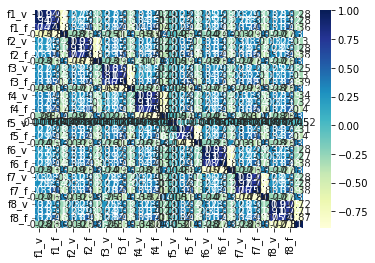

In [ ]:
# This plot is crucial for visualising correlation.
dataplot=sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

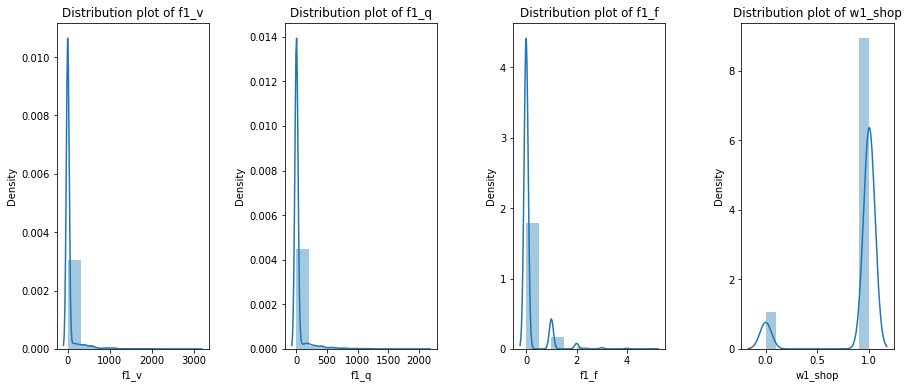

In [ ]:
### Sampled three varialbes to see their shape
# Checking frequency districutio of input variables.
plt.figure(1, figsize=(15,6))
n=0
for i in ['f1_v','f1_q','f1_f','w1_shop']:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(X[i],bins=10)
    plt.title('Distribution plot of {}'.format(i))
plt.show()

In [ ]:
## Above graphs were drawn to check the behavior of data. We will do standardization of Training, Valid and Test data sets.

In [ ]:
# 608 is last date of our data set. 
output_window_size = 28
tumbling_window_size = 7
X_test, y_test = get_dataset( 608- output_window_size, tumbling_window_size, output_window_size )
X_val, y_val = get_dataset(608- 2*output_window_size, tumbling_window_size, output_window_size )
X_train, y_train = get_dataset( 608 - 3*output_window_size, tumbling_window_size, output_window_size )



 * sqlite:///drive/MyDrive/ml15.sqlite
Done.
 * sqlite:///drive/MyDrive/ml15.sqlite
Done.
 * sqlite:///drive/MyDrive/ml15.sqlite
Done.


In [ ]:
X_test.shape

(5160, 32)

2. 
Machine Learning Tasks

In [ ]:
###########Machine Learning Tasks #######################
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

I. Hyper parameter Tuning/Optimization for Random Forest Model

In [ ]:
# GridSearchCV() function form sklearn will be used to perform the hyperparameter tuning. It will perform all possible pair wise computations of the two hyper parameres
#that we are going to use in the examples here. In simple words, it will determine best values of n_estimators and max_features.
from sklearn.model_selection import GridSearchCV
import numpy as np
max_features_range=np.arange(1, 13, 1)   # Using maximum 13 features
n_estimators_range = np.arange(10,140,10) # 14 x 13 = 182 models will be built before finding best one.
param_grid=dict(max_features=max_features_range, n_estimators=n_estimators_range)
rf = RandomForestClassifier()
grid= GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)


In [ ]:
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
     % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 11, 'n_estimators': 120} with a score of 0.83


In [ ]:
# DF FOR Grid search parameters and their Accuracy Scores
import pandas as pd
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]), pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.818217
1,1,20,0.824225
2,1,30,0.823062
3,1,40,0.825000
4,1,50,0.822868


In [ ]:
## preparing data for making contour plots
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.818217
             20            0.824225
             30            0.823062
             40            0.825000
             50            0.822868
...                             ...
12           90            0.826357
             100           0.826938
             110           0.829070
             120           0.826550
             130           0.827326

[156 rows x 1 columns]

In [ ]:
# Contouring and pivoting 
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.818217  0.824225  0.823062  0.825000  0.822868  0.822868   
2             0.820930  0.821705  0.823256  0.821124  0.825000  0.824225   
3             0.813566  0.824031  0.821318  0.825388  0.826744  0.824806   
4             0.820349  0.823062  0.825581  0.824612  0.826163  0.823643   
5             0.821705  0.822287  0.826357  0.821899  0.825581  0.827713   
6             0.816860  0.822287  0.824419  0.826744  0.824612  0.826163   
7             0.818023  0.826744  0.823062  0.826550  0.825000  0.825581   
8             0.815891  0.824225  0.824031  0.824612  0.826357  0.826357   
9             0.821124  0.822287  0.825388  0.825194  0.827132  0.824612   
10            0.821124  0.823450  0.821899  0.826163  0.823643  0.824806   
11            0.821124  0.822287  0.822674  0.826163  0.825194  0.823837   
12            0.820736  0.824419  0.820349  0.824612  0.825775  0.825775   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.823450  0.826550  0.825388  0.823062  0.826163  0.824806   
2             0.823643  0.824806  0.823837  0.826744  0.824419  0.824031   
3             0.822481  0.823450  0.824806  0.826744  0.826357  0.824031   
4             0.822674  0.827713  0.823450  0.823643  0.824806  0.824806   
5             0.823837  0.826357  0.823643  0.824031  0.826550  0.824031   
6             0.826357  0.825775  0.828295  0.827713  0.826744  0.827519   
7             0.825775  0.826163  0.825581  0.828876  0.826550  0.825775   
8             0.824612  0.826938  0.827132  0.828488  0.825194  0.825775   
9             0.825581  0.826357  0.826163  0.826744  0.825581  0.826550   
10            0.827907  0.827132  0.826938  0.827326  0.827132  0.828101   
11            0.827713  0.825581  0.827132  0.825775  0.827326  0.829651   
12            0.826938  0.825775  0.826357  0.826938  0.829070  0.826550   

                        
n_estimators       130  
max_features            
1             0.824031  
2             0.826163  
3             0.824612  
4             0.824225  
5             0.825969  
6             0.825000  
7             0.827326  
8             0.826744  
9             0.827132  
10            0.826357  
11            0.826938  
12            0.827326

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

Source:https://github.com/dataprofessor/code/blob/master/python/hyperparameter_tuning.ipynb
Note: It is learned form this link. 

In [ ]:
# 2D Counter plot
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
### Cross Validation   #############
# Cross validation is a way we use our training data in order to get good estimates of how well our model will perform on data it has not seen before, i.e., test data.
#Note, best estimator is using the test data, but its a good way to check before using test data.
# We use K-fold cross validation when we have un-balanced data set
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
svm_clf = svm.SVC(kernel='linear',C=100)
scores=cross_val_score(svm_clf, X_train, y_train ,cv=5)
print(scores)

In [ ]:
# This function is taken from class lectures. 
def print_variable_importances( feature_names, dict_in, show_top = 10 ):
  """
  Prints a table of feature importance scores.
  
  Keyword arguments
  feature_names -- list of feature names. Must have the same ordering as the 
                   scores in each instance of list_of_scores (see below)
  dict_in       -- dictionary of the form {method_name:list_of_scores} where:
                   method_name    -- string
                   list_of_scores -- list of scores, ordered in the same order
                                     as the passed feature_names
  show_top      -- number of features to show (default 10, None to print all)
  """


  # 
  if show_top is None:
    show_top = len(feature_names)
  
  # Set up lists to hold the titles and score_feature tuples
  # We need a list so that they maintain fixed order as we 
  # iterate over them row-by-row.
  to_print_titles = []
  to_print_scores = []
  
  # Pair each list of scores with a copy of the feature names and sort
  # based on the variable importance score descending
  for k, v in dict_in.items():
    # zip pairs, sorted sorts, reverse orders descending
    feature_names_plus_scores = sorted( zip(v, feature_names) )
    feature_names_plus_scores.reverse()
    to_print_titles.append(k)
    to_print_scores.append(feature_names_plus_scores)
    
    
  # Print the scores
  
  # Create a list of strings to print in each header cell
  line_parts = []
  for j in range(len(to_print_titles)):
    line_parts.append('{:<38}'.format(to_print_titles[j]))
  
  # Print each header cell using a separator ' | ', adding the fixed rank column header 
  print('Rank | ' + ' | '.join( ['{:<38}'.format(x) for x in to_print_titles] ) )
  
  # Print the header underline
  print('---- + ' + ' + '.join( [ '-'*38 ]*len(to_print_titles) ) )
  
  # Print each line
  for i in range(show_top):
    # Create a list of strings to print for each row cell
    line_parts = []
    for j in range(len(to_print_titles)):
      line_parts.append(  '{:<30}: {:.4f}'.format(to_print_scores[j][i][1], to_print_scores[j][i][0]) )
    # Print the row by:
    # (1) joining each row cell using a separator ' | '
    # (2) adding the fixed rank column header 
    print( '{:<4} | '.format(str(i)) + ' | '.join(line_parts) )
      
    
 

In [ ]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 0.0)
vt.fit(X_train)

#np.invert( vt.get_support() )

X_train.columns[np.invert(vt.get_support())]


In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif

In [ ]:


selector = GenericUnivariateSelect( score_func = mutual_info_classif, mode = 'k_best', param = 10)

selector.fit(X_train, y_train)



In [ ]:


feature_importance_scores = {}
feature_importance_scores['Filter'] = selector.scores_

print_variable_importances( X_train.columns, feature_importance_scores )

II. Hyper Parameter Tuning/Optimization for SVc

In [ ]:
#B. Support Vector Machine Hyper Parameter Tuning
#Three kernals: rbf, poly and linear. We will use just rbf as it takes a lot of time to process. However, for more accurate kernal, all three shoudl be tried even at the expense of long processing time.

In [ ]:
# Hyper parameterization of SVC
from sklearn.model_selection import GridSearchCV
# Kernal parameters seperate data through planes. For instnce, rbf and poly seperate data in a non-linear hyper-plane
# linear in linear plane
# Gamma fits the training data set. Higher the gamma, higher its fitting of training data set.
# C is the penalty paramter of the error term. It controls trade off between smooth decision boundary and classifying the training points correctly.
# Degree is used to find the hyperplane to split the data.
param_grid={'C':[0.1,1,100,1000],'kernel':['rbf'],'gamma':[0.01,0.03,0.1,0.3,1,3,10,30,100]}
grid=GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

In [ ]:
print("Best parameters for svm model :",grid.best_params_)
print("Accuracy with the best parameters: ", grid.score(X_test, y_test))

III.Deploying Machine Learning models using best parameters

In [ ]:
###### Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(max_features=12, n_estimators = 100)
rf.fit( X_train, y_train )
pred_rf = rf.predict(X_val)
accuracy_rf= metrics.accuracy_score(y_test, pred_rf)
print('Random Forest Accuracy: ', accuracy_rf)

In [ ]:
rf_report = classification_report(y_test, pred_rf)
print(rf_report)

In [ ]:
rf_matrix = plot_confusion_matrix(rf, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for Random Forest Classifier')
plt.show(rf_matrix)
plt.show()

In [ ]:
############ SUPPORT VECTOR MACHINE ##################


In [ ]:

# SVC requres standardization of data. 
# Following columns in Train, Test and Validation will be standardized manually.
#
col=['f1_v', 'f1_q', 'f1_f','f2_v', 'f2_q', 'f2_f','f3_v', 'f3_q', 'f3_f', 'f4_v', 'f4_q', 'f4_f','f5_v', 'f5_q', 'f5_f','f6_v', 'f6_q', 'f6_f','f7_v', 'f7_q', 'f7_f', 'f8_v', 'f8_q', 'f8_f'] # These columns will be standardized in each data frame
X_train_columns = X_train[col]
X_train[col] = (X_train_columns-X_train_columns.mean())/X_train_columns.std()
 #Standardization of Valid and Test data frames using the mean and standard deviation of TRAINING Data Frame.
X_val_columns = X_val[col]
X_val[col] = (X_val_columns-X_train_columns.mean())/X_train_columns.std() ####### Standardizing X_val using the mean ans std of X_Training

X_test_columns = X_test[col]
X_test[col] = (X_test_columns-X_train_columns.mean())/X_train_columns.std()     ##### Standardizing X_test using the mean nad std of X_Trainig

In [ ]:
########## Support Vector Machine ##############
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
clf.fit(X_train,y_train)
preds_svc = clf.predict(X_val)
accuracy_svc= metrics.accuracy_score(y_test, preds_svc)
print('Support Vector Machine: ', accuracy_svc)

In [ ]:
svc_report = classification_report(y_test, preds_svc)
print(svc_report)

In [ ]:
svc_matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for Support Vector Classifier')
plt.show(svc_matrix)
plt.show()

IV: Predicting future churn using our best deployed model: Support Vector Machine with hyper parameters

In [ ]:
# Date of analysis: 2022-03-22 = 608 in our conversion 
#

In [ ]:
# Predicting for next period: 2022-04-20 or 608+28= 636
# 2022-04-20 or 636 is our predition date
prediction_day=636
output_window_size = 28
tumbling_window_size = 7
X_test, y_test = get_dataset( prediction_day- output_window_size, tumbling_window_size, output_window_size )
X_val, y_val = get_dataset(prediction_day- 2*output_window_size, tumbling_window_size, output_window_size )
X_train, y_train = get_dataset( prediction_day - 3*output_window_size, tumbling_window_size, output_window_size )


In [ ]:
clf = SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)  ## REMEBER value of gamma and C are hyper parameters
clf.fit(X_train,y_train)
preds_svc = clf.predict(X_test)
#accuracy_svc= metrics.accuracy_score(y_test, preds_svc)
#print('Support Vector Machine: ', accuracy_svc)
print(preds_svc)

In [ ]:

print(clf.predict(X_test))

In [ ]:
churn_prediction = pd.DataFrame(preds_svc, index=X_test.index, columns=['Churn_predictions'])

In [ ]:
churn_prediction.head()

In [ ]:
churn_prediction.Churn_predictions.value_counts()

In [ ]:
import plotly.graph_objects as go
values=churn_prediction['Churn_predictions'].value_counts()
fig = go.Figure(data=[go.Pie(values=values,labels=[1,0], pull=[0.2,0,0,0],title='SVM prediction of churning and non-churnng customers')])
fig.show()


V. Pen-Portraits 

In [ ]:
# Pen profiles of both classes
Pen_port_non_churn=list(churn_prediction[churn_prediction['Churn_predictions']==0].index.values)
X_test[X_test.index.isin(Pen_port_non_churn)].describe()

In [ ]:
Pen_port_churn=list(churn_prediction[churn_prediction['Churn_predictions']==1].index.values)
X_test[X_test.index.isin(Pen_port_churn)].describe()


In [ ]:
#Creating data frame to do pen profilig for customers. 
sql = """
     select customer_id, sum(value) as tot_val, sum(qty) as tot_qty, count(distinct receipt_id) as frequency
     from receipts
     join receipt_lines
     using (receipt_id)
     group by customer_id
      """
RFM = %sql {sql}
RFM = RFM.DataFrame()

In [ ]:
RFM.head()

In [ ]:
# Let's join two tables 
pen_pro=pd.concat([RFM,churn_prediction], axis=1)


In [ ]:
pen_pro.head()

In [ ]:
pen_pro_churn = pen_pro[pen_pro['Churn_predictions']==1]
pen_pro_nonchu= pen_pro[pen_pro['Churn_predictions']==0]

churners = pen_pro_churn.shape[0] 
print('Number of Churning',churners)

Non_churners = pen_pro_nonchu.shape[0] 
print('Number of Non-churners',Non_churners)

In [ ]:
pen_pro_churn.describe()

In [ ]:
pen_pro_nonchu.describe()